<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Maksim/Entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = datasets.load_iris()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

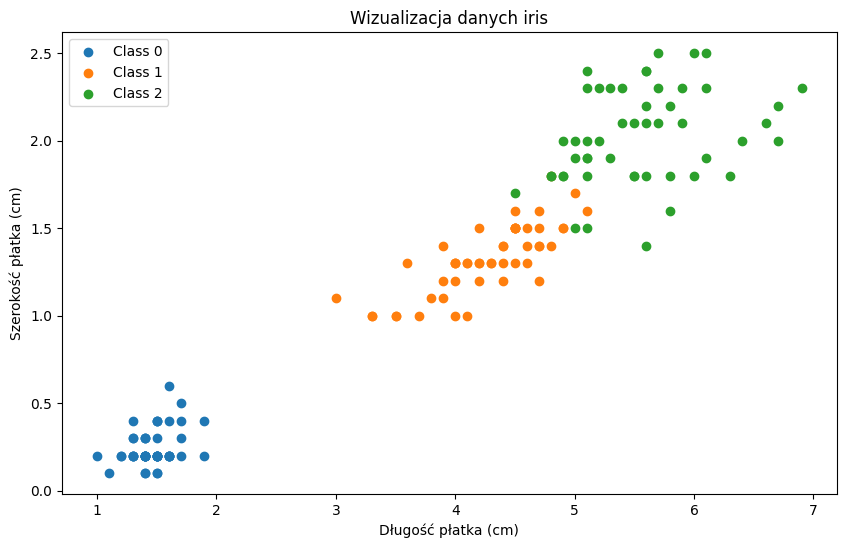

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=f'Class {i}')
plt.xlabel('Długość płatka (cm)')
plt.ylabel('Szerokość płatka (cm)')
plt.title('Wizualizacja danych iris')
plt.legend()
plt.show()

In [ ]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Obliczenie entropii przed podziałem
entropy_before_split = entropy(y_train)
print("Entropia przed podziałem:", entropy_before_split)

# Obliczenie entropii dla pierwszego podziału
threshold_a = 0.5
left_indices_a = X_train[:, 3] <= threshold_a
right_indices_a = ~left_indices_a
entropy_left_a = entropy(y_train[left_indices_a])
entropy_right_a = entropy(y_train[right_indices_a])
entropy_after_split_a = (np.sum(left_indices_a) / len(y_train)) * entropy_left_a + (np.sum(right_indices_a) / len(y_train)) * entropy_right_a
print("Entropia po pierwszym podziale:", entropy_after_split_a)

# Obliczenie entropii dla drugiego podziału
threshold_b = 0.38
left_indices_b = X_train[:, 3] <= threshold_b
right_indices_b = ~left_indices_b
entropy_left_b = entropy(y_train[left_indices_b])
entropy_right_b = entropy(y_train[right_indices_b])
entropy_after_split_b = (np.sum(left_indices_b) / len(y_train)) * entropy_left_b + (np.sum(right_indices_b) / len(y_train)) * entropy_right_b
print("Entropia po drugim podziale:", entropy_after_split_b)

# Obliczenie zysku informacyjnego dla pierwszego podziału
information_gain_a = entropy_before_split - entropy_after_split_a
print(f"Zysk informacyjny dla podziału a): {information_gain_a}")

# Obliczenie zysku informacyjnego dla drugiego podziału
information_gain_b = entropy_before_split - entropy_after_split_b
print(f"Zysk informacyjny dla podziału b): {information_gain_b}")

Entropia przed podziałem: 1.5801537588229282
Entropia po pierwszym podziale: 0.7777319307680837
Entropia po drugim podziale: 0.9608522816667814
Zysk informacyjny dla podziału a): 0.8024218280548445
Zysk informacyjny dla podziału b): 0.6193014771561468


In [ ]:
from collections import Counter

class_counts = Counter(y_train)
total_samples = len(y_train)
class_probabilities = [count / total_samples for count in class_counts.values()]


dataset_entropy = -np.sum([p * np.log2(p) for p in class_probabilities])

print("Entropia dla całego zestawu danych:", dataset_entropy)

Entropia dla całego zestawu danych: 1.5801537588229282


In [ ]:
# Drzewo decyzyjne
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)


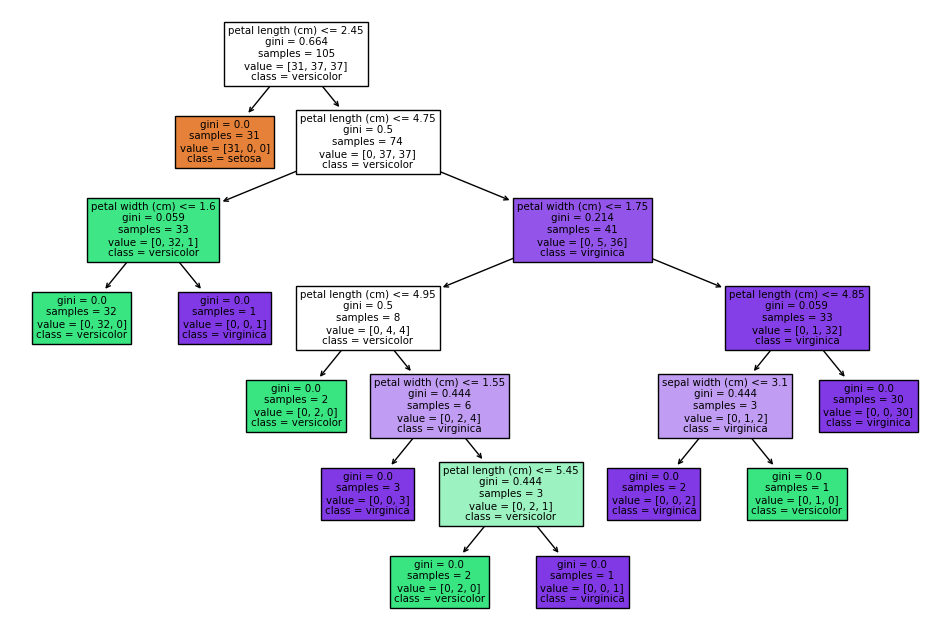

In [ ]:
# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

In [ ]:
# Las losowy
rf_clf = RandomForestClassifier(n_estimators=15, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [ ]:
# Ocena wyników
print("\nWyniki dla drzewa decyzyjnego:")
print("Dokładność:", accuracy_score(y_test, tree_pred))
print("Raport klasyfikacji:")
print(classification_report(y_test, tree_pred))

print("\nWyniki dla lasu losowego:")
print("Dokładność:", accuracy_score(y_test, rf_pred))
print("Raport klasyfikacji:")
print(classification_report(y_test, rf_pred))


Wyniki dla drzewa decyzyjnego:
Dokładność: 1.0
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Wyniki dla lasu losowego:
Dokładność: 1.0
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

